### 선형회귀 이해하기

- 성적데이터를 기반으로 선형회귀를 이해해보자

In [1]:
# 성적데이터 생성을 위한 라이브러리 꺼내오기
import pandas as pd
import matplotlib. pyplot as plt

In [2]:
# 성적데이터 생성
data = pd.DataFrame([[2,20,],[4,40],[8,80],[9,90]],
             index=['현석', '준희','강련','찬홍'],
             columns=['시간', '성적'])


### MSE가 최소가 되는 최적의 w,b를 찾는 방법
    - MSE : 평균제공오차(Mean Squered Error) ---> 비용함수(cost)
    - 1. 수학 공식을 이용한 해석적 모델
    - 2. 경사하강법(XGBoost에서 오차를 계산하는 방법)

#### 수학공식을 이용한 해석적 모델
    - LinearRegression
    - 공식을 이용해서 적은 계산을 한번에 최적의 선형함수를 찾는 방법
    - 공식이 완벽하지 않을 경우 잘 못찾을 수도 있고,
    - 공식이 잘못되었더라도 고칠수 없다는 문제가 있음 ==> 규제를 접목 개선

In [3]:
from sklearn.linear_model import LinearRegression

# 모델 생성 및 하이퍼파라미터 설정
linear_model = LinearRegression()

# 학습
linear_model.fit(data[['시간']], data['성적'])  # 문제 : 2차원, 정답 : 1차원


LinearRegression()

### y = wx + b(1개의 문제)

In [4]:
# w : 기울기, 가중치 
display('기울기, 가중치 : ', linear_model.coef_)

# b : 절편, 편향
display('절편, 편향 : ', linear_model.intercept_)


'기울기, 가중치 : '

array([10.])

'절편, 편향 : '

7.105427357601002e-15

In [5]:
# 나행씨가 7시간 공부햇을때 몇 점?
linear_model.predict([[7]])

c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

#### H(x)
    - 가설함수

In [6]:
# 함수 정의
def h(w,x):
    return w*x+0

    

#### 비용함수(cost function) 정의
    - 비용 = 오차

In [7]:
# 비용함수 정의
# data : 문제
# target : 정답(실제 값)
# weight : 가중치

def cost(data, target, weight):
    # 예측값
    y_pre = h(weight,data)
    # 평균제곱오차 = ((예측값 - 실제값)  **2).mean()
    error = ((y_pre-target)**2).mean()
    return error

    

In [8]:
# 가중치에 따른 오차값 확인
cost(data['시간'], data['성적'],5)

1031.25

In [9]:
cost(data['시간'], data['성적'],8)

165.0

In [10]:
cost(data['시간'], data['성적'],10)

0.0

In [11]:
# 가중치 변화에 따른 비용함수의 변화를 그래프로 그려보기
cost_list = [] # 가중치 변화에 따른 평균제곱 오차값 리스트

for i in range(1,20):
    err = cost(data['시간'], data['성적'],i)
    cost_list.append(err)

cost_list

[3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25]

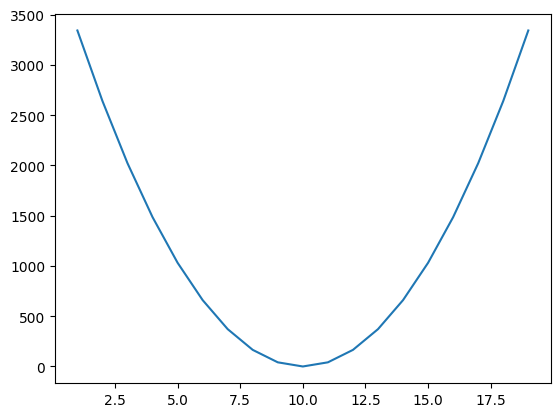

In [12]:
# 비용함수(MSE) 그래프로 그리기
plt.plot(range(1,20), cost_list)


In [13]:
linear_model.score(data[['시간']],data['성적'])

# 분류모델에서의 score ==> 정확도
# 회귀모델에서의 score ==> 유사도(MSE를 기반으로한 R^2score)

1.0

### 경사하강법
    - SGDRegressor
    - 점진적으로 오차가 작은 선형함수를 찾아가는 방법
    - 오차를 수정하는 방향으로 그래프를 다시 그려줌
    - 선형함수를 잘못 찾았을 경우 수정이 가능
    - 점진적으로 찾아가므로 계산량이 많아서 시간이 오래걸림

In [14]:
from sklearn.linear_model import SGDRegressor

# 모델생성 및 하이퍼파라미터 설정
sgd_model = SGDRegressor(max_iter=5000, # 가중치를 업데이트 반복 횟수
                         eta0= 0.001,   # 학습률
                         verbose = 1    # 학습하는 과정을 확인
                         )

# 학습
sgd_model.fit(data[['시간']],data['성적'])

-- Epoch 1
Norm: 1.20, NNZs: 1, Bias: 0.175382, T: 4, Avg. loss: 1895.532670
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.06, NNZs: 1, Bias: 0.296417, T: 8, Avg. loss: 1490.061601
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.75, NNZs: 1, Bias: 0.394038, T: 12, Avg. loss: 1217.312314
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.33, NNZs: 1, Bias: 0.476212, T: 16, Avg. loss: 1014.163223
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.84, NNZs: 1, Bias: 0.547347, T: 20, Avg. loss: 855.544259
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.29, NNZs: 1, Bias: 0.609813, T: 24, Avg. loss: 728.488493
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.69, NNZs: 1, Bias: 0.665369, T: 28, Avg. loss: 624.712183
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.04, NNZs: 1, Bias: 0.715148, T: 32, Avg. loss: 538.881581
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.36, NNZs: 1, Bias: 0.760086, T: 36, Avg. loss: 467.085168
Total training time: 0.00

SGDRegressor(eta0=0.001, max_iter=5000, verbose=1)

In [15]:
# 예측
sgd_model.predict([[7]])

c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([69.88669228])

In [16]:
# 가중치(w), 편향(b) 확인하기
print(sgd_model.coef_)
print(sgd_model.intercept_)

display(sgd_model.coef_)
display(sgd_model.intercept_)

[9.79124217]
[1.3479971]


array([9.79124217])

array([1.3479971])

In [17]:
sgd_model.score(data[['시간']],data['성적'])
# 1에 가까울수록 모델이 예측한 성능이 높다고 판단

0.9995375788466502

선형모델
- 입력 데이터를 가장 잘 설명할 수 있는 선형함수를 구하는 것
  (데이터에 대한 선형함수)
  y = wx + b ==> y = w1x1 + w2x2 + .... + wpxp + b
- 입력 데이터를 완벽하게 설명하는 것은 불가능? 
  ==> 오차가 가장 작은 선형함수찾자 : 선형모델의 개념
- 오차 : 실제값 - 예측값 
  오차를 그냥 더하게 되면 오차(+, -)들끼리 상쇄
  -> 오차에서 부호(절대값, 제곱)를 없애고 오차들을 더하겠다. 
  MSE : 평균제곱오차 ==> 선형모델 
  MSE가 가장 작은 선형함수를 최적의 선형함수 

- MSE가 가장 작은 선형함수 찾는 방법
  1. 수학적 공식을 적용한 해석적 방법 - LinearRegression
       장점 : 한번에 최적의 선형함수를 찾겠다 --> 계산이 빠르다 
      단점 : 공식이 완벽하지 않을 경우 잘못 찾을 수도 있음 ==> 고칠 수 없는 문제 발생
  2. 경사하강법 - SGDRegressor
       점진적으로 오차가 작은 선형함수를 찾아가는 방법
      ==> 오차를 수정하는 방향으로 그래프를 다시 그려줌 
      장점 : 잘 못 찾았을 경우 수정이 가능
      단점 : 점진적으로 찾아가기때문에 계산량이 많음 --> 시간이 오래걸림
      학습율(learning rate) - eta0
      - 너무 크게 설정 : 오차가 커져서 발산
      - 너무 작게 설정 : 국소지역점에 빠져서 최적의 해를 찾지 못함 